Author:  Raphael Cousin

Project: https://github.com/racousin/algorithms_basics_python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *
import seaborn as sns
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin
from sklearn.tree import DecisionTreeClassifier
from numpy.linalg import eigh

In [2]:
np.random.seed(seed=42)

# Theory
Find a projection matrix $W \in \mathbb{R}^{p\times d}$ , a rebuild matrix $U \in \mathbb{R}^{d\times p}$ such as:

$$(P1) \quad \underset{w,u}{min} \mathbb{E} (||X - U W X||^2)$$

$\underline{lemma:}$ if $p \leq q$ and $(P1)$ has a solution so $\exists U \in \mathbb{R}^{d \times p}$ such as $U^T U = I_p$ and $(U^T,U)$ is solution of $(P1)$

$\underline{consequence:}$

$$ (P1) \Leftrightarrow \underset{U}{min} \mathbb{E} (||X - U U^T X||^2)$$ with $U^T U = I_p$

$$ (P1) \Leftrightarrow \underset{U}{max} tr(U^T\mathbb{E}(XX^T)U)$$ with $U^T U = I_p$

$\underline{theoreme:}$

$C \in \mathbb{R}^{d\times d}$ spd.
We note $\sum_{i=1}^d \lambda_i v_i v_i^T$ his proper value decomposition. Also we note $V_+ = (v_{d - k +1},...,v_{d})$ so:
$$\underset{U}{max} tr(U^TCU) = tr(V_+^T CV_+)$$ with $U^T U = I_k$

# Example

In [3]:
def plotXY(X, Y):
    if X.shape[1] == 1:
        for cl in np.unique(Y):
            plt.plot(X[Y==cl, 0], 0)
    else:
        for cl in np.unique(Y):
            plt.scatter(X[Y==cl, 0], X[Y==cl, 1])

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=3,
                           n_features=3, n_redundant=0, n_clusters_per_class=1)

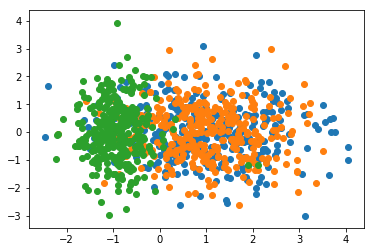

In [5]:
plotXY(X[:,0:2], y)

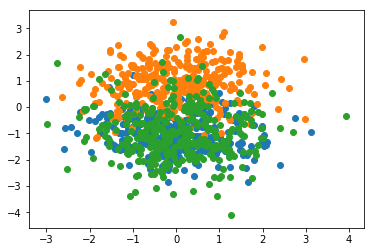

In [6]:
plotXY(X[:,1:3], y)

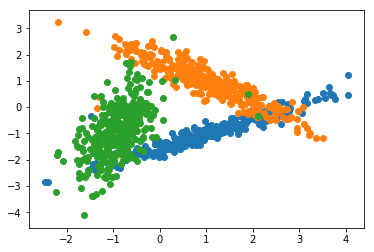

In [12]:
plotXY(X[:,[0,2]], y)

In [7]:
class PCA(BaseEstimator, LinearClassifierMixin):
    def __init__(self, p = 2):
        self.V = None
        self.C = None
        self.p = p;
        self.ratio = None;
        
    def fit(self, X):
        self.C = X.T.dot(X)
        ve, U = eigh(self.C)
        self.ratio = ve[-self.p:].sum() / ve.sum()
        self.V = np.fliplr(U[:,-self.p:])
        return self.ratio
        
    def transform(self, X):
        return X.dot(self.V)

In [8]:
pca = PCA()
ratio = pca.fit(X)
print(ratio)
X_t = pca.transform(X)

0.7796386672053862


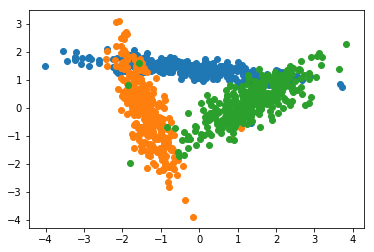

In [9]:
plotXY(X_t, y)